In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification

D:\ruddhi\iitgn-study\ML\Regressors\MachineLearning_Regressors\Assignment1(HAR_And_DecisionTree)\DecisionTreeImplementation
D:\ruddhi\iitgn-study\ML\Regressors\MachineLearning_Regressors\Assignment1(HAR_And_DecisionTree)\DecisionTreeImplementation


In [2]:
np.random.seed(42)

In [3]:
# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)


Text(0.5, 1.0, 'Classification Experiment Data')

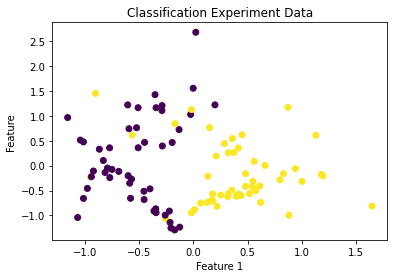

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature ')
plt.title('Classification Experiment Data')

In [5]:
df_X=pd.DataFrame(X,columns=['Feature-1','Feature-2'])

In [6]:
df_y=pd.DataFrame(y,columns=['Result'])

In [7]:
df=pd.concat([df_X,df_y],axis=1,ignore_index=False)

## (a)

In [8]:
df=df.sample(frac=1,random_state=42).reset_index(drop=True)

In [9]:
X=df.iloc[:,[0,1]]

In [10]:
y=df.iloc[:,[2]]

In [11]:
X=np.array(X)

In [12]:
y=np.array(y).flatten()

In [13]:
record_cnt=X.shape[0]
indices=np.arange(record_cnt)

In [14]:
splitting_id=0.7*record_cnt

In [15]:
splitting_id=int(splitting_id)

In [16]:
X_train = X[indices[:splitting_id]]
y_train = y[indices[:splitting_id]]
X_test = X[indices[splitting_id:]]
y_test = y[indices[splitting_id:]]

In [17]:
X_train=pd.DataFrame(X_train, columns=['Feature1', 'Feature2'])

In [18]:
y_train= pd.Series(y_train)

In [19]:
dt=DecisionTree(criterion='entropy')

In [20]:
dt.fit(X_train,y_train)

In [21]:
X_test=pd.DataFrame(X_test, columns=['Feature1', 'Feature2'])

In [22]:
y_pred=dt.predict(X_test)

In [23]:
y_test=pd.Series(y_test)
print(type(y_test))

<class 'pandas.core.series.Series'>


In [24]:
y=pd.Series(y)


In [25]:
acc=accuracy(y_test,y_pred)
print("Accuracy: ",acc)
for cls in y.unique():
    prec=precision(y_pred,y_test,cls)
    print(f"Precision for class-{cls}: ",prec)
    rec=recall(y_pred,y_test,cls)
    print(f"Recall for class-{cls}: ",rec)

Accuracy:  0.9333333333333333
Precision for class-1:  0.9
Recall for class-1:  1.0
Precision for class-0:  1.0
Recall for class-0:  0.8333333333333334


## (b)

In [26]:
K=5 #no. of folds
depths=range(0,6)

In [27]:
fold_size=len(df)//K

In [28]:
best_depths=[]
fold_accs=[]

In [ ]:
for fold_no in range(K):
    start=fold_no*fold_size
    end=(fold_no+1)*fold_size
    val_data=df.iloc[start:end]
    train_data=pd.concat([df.iloc[:start],df.iloc[end:]],axis=0)
    
    X_train=train_data.iloc[:,:-1] # all cols from train_data selected except the last
    y_train=train_data.iloc[:,-1]
    X_val=val_data.iloc[:,:-1]
    y_val=val_data.iloc[:,-1]
    
    depth_accs=[]
    
    for depth in depths:
        inner_accs=[]
        for inner_fold_no in range(K):
            
            inner_start=inner_fold_no*fold_size
            inner_end=(inner_fold_no+1)*fold_size
            inner_val_data=df.iloc[inner_start:inner_end]
            inner_train_data=pd.concat([df.iloc[:inner_start],df.iloc[inner_end:]],axis=0)
            
            X_inner_train = inner_train_data.iloc[:, :-1]
            y_inner_train = inner_train_data.iloc[:, -1]
            X_inner_val = inner_val_data.iloc[:, :-1]
            y_inner_val = inner_val_data.iloc[:, -1]
            
            dec_tree = DecisionTree(criterion="entropy",max_depth=depth)
            dec_tree.fit(X_inner_train, y_inner_train)
            y_inner_pred = dec_tree.predict(X_inner_val)
            
            inner_accs.append(accuracy(y_inner_pred,y_inner_val))
            
        depth_accs.append(np.mean(inner_accs))
        
    best_depth = depths[np.argmax(depth_accs)]
    best_depths.append(best_depth)
    
    outer_dec_tree=DecisionTree(criterion="entropy",max_depth=best_depth)
    outer_dec_tree.fit(X_train,y_train)
    y_val_pred=outer_dec_tree.predict(X_val)
    
    fold_accs.append(accuracy(y_val_pred,y_val))
    
avg_acc=np.mean(fold_accs)
opt_depth=np.mean(best_depths)

In [ ]:
print(f"Optimal Depth is : {opt_depth}")
print(f"Average Accuracy is : {avg_acc}")